churn - yes (discontinue service), no (continue service)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
## Dropping Customer ID Column as It is Not Important For Us
df = df.drop(['customerID'], axis=1)

## Exploratory Analysis

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [7]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

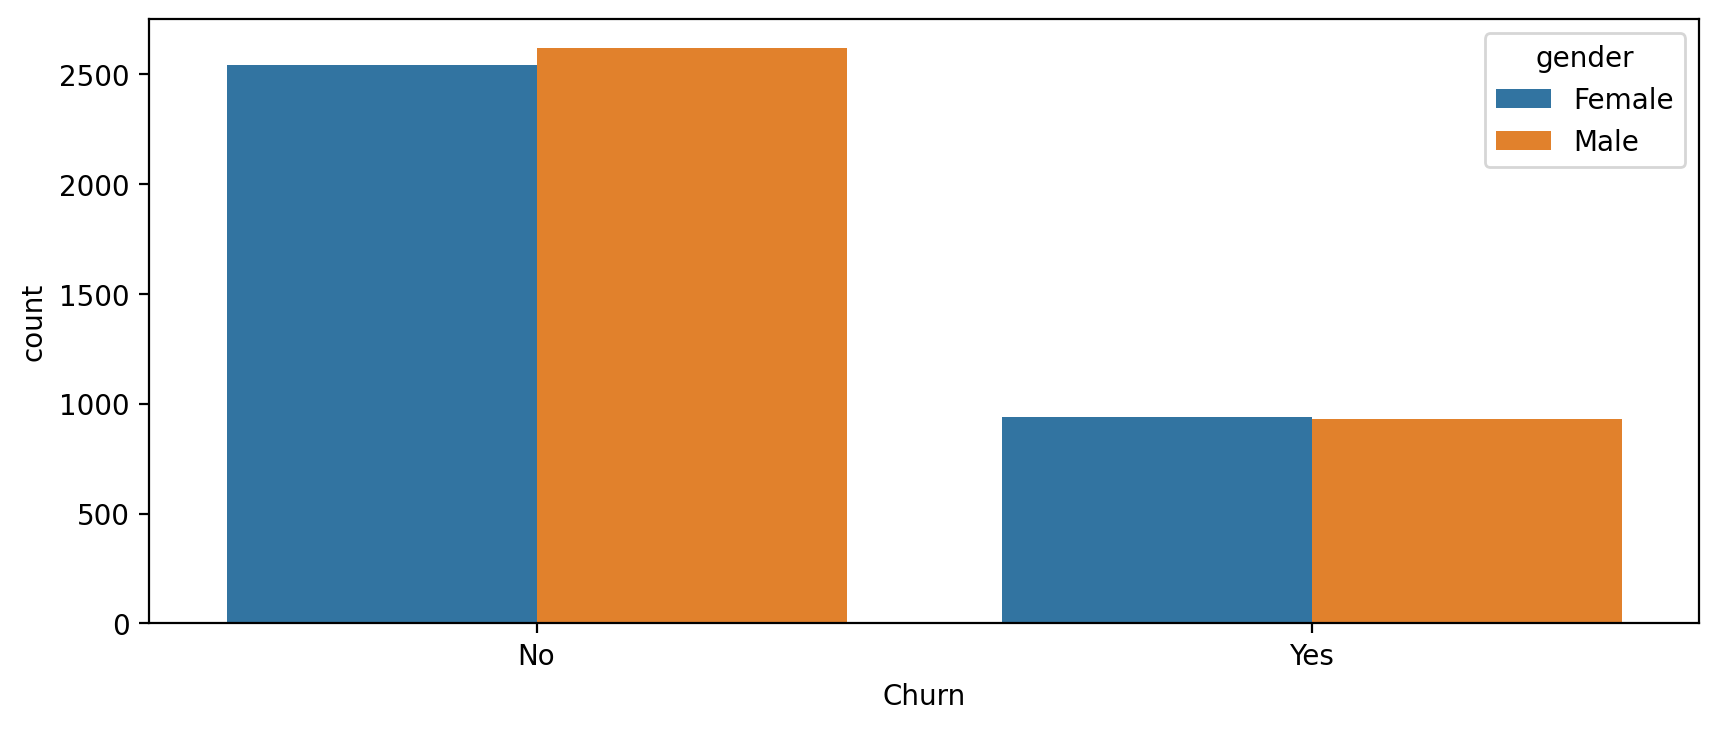

In [8]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='Churn',data=df, hue='gender')

<AxesSubplot:xlabel='Churn', ylabel='count'>

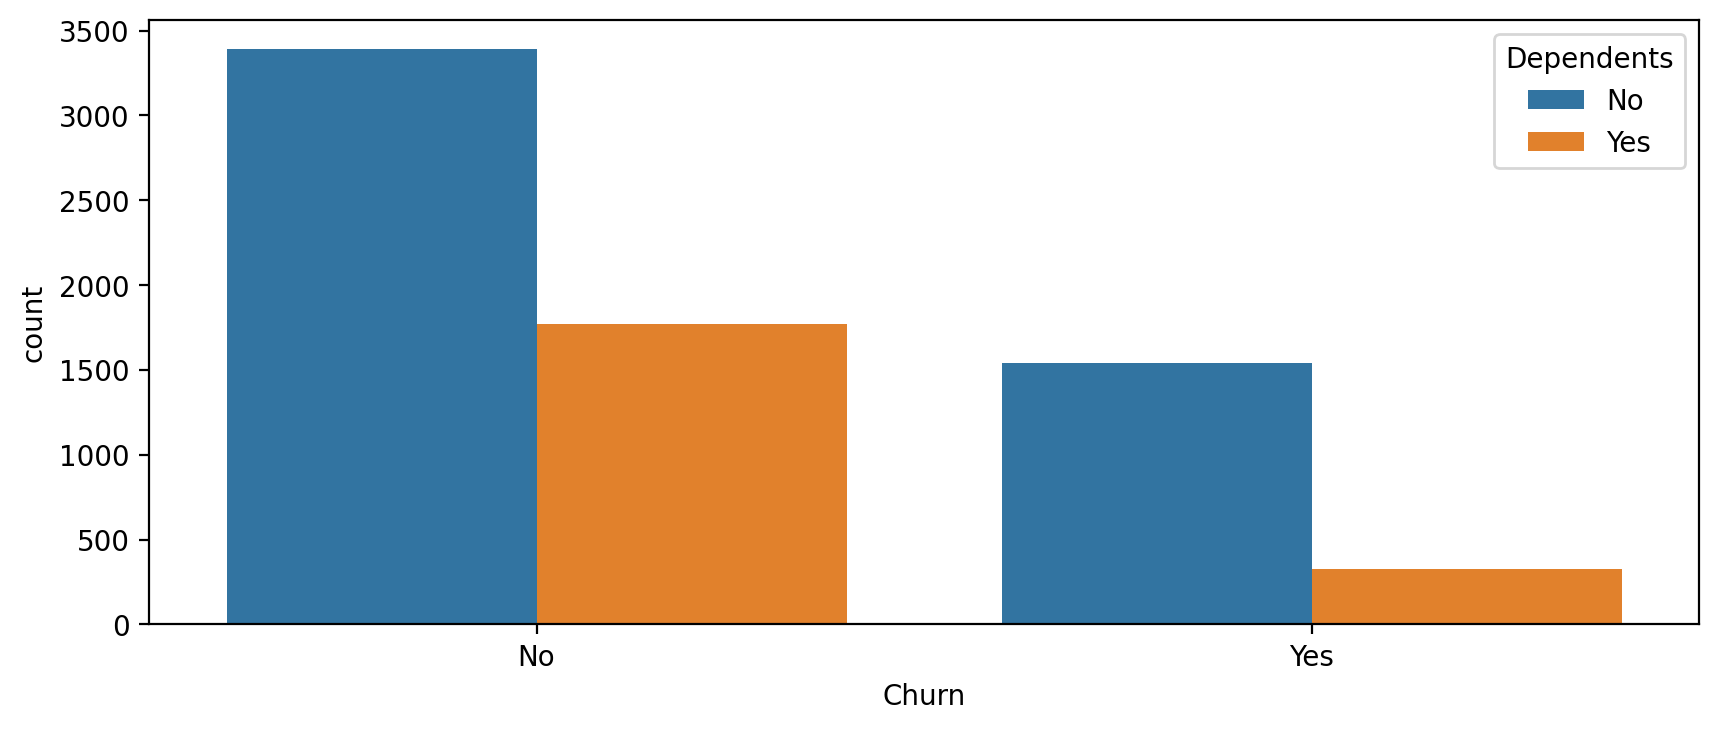

In [9]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='Churn',data=df, hue='Dependents')

<AxesSubplot:xlabel='Churn', ylabel='count'>

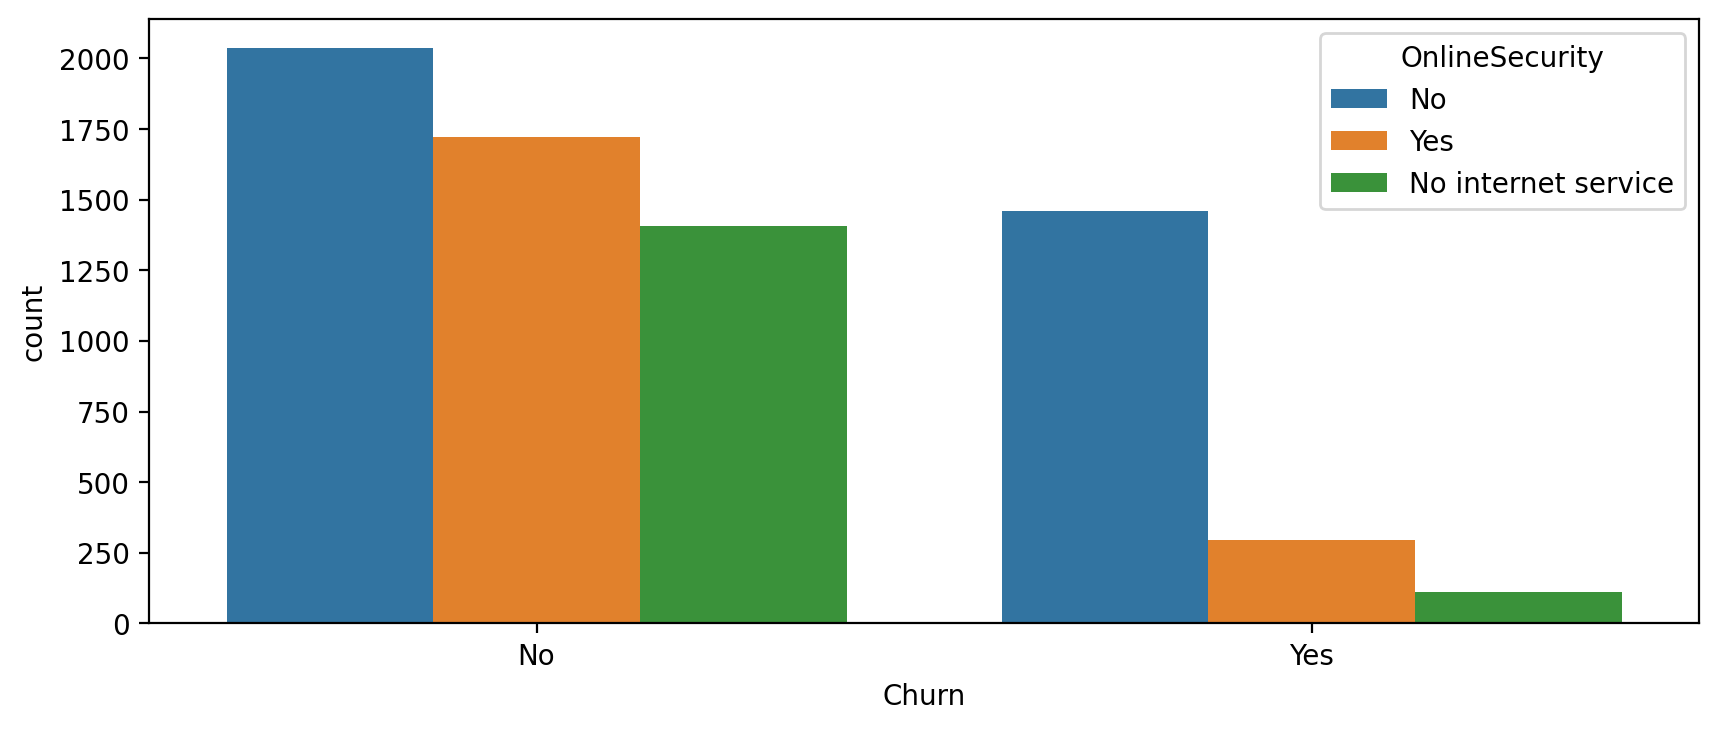

In [10]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='Churn',data=df, hue='OnlineSecurity')

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

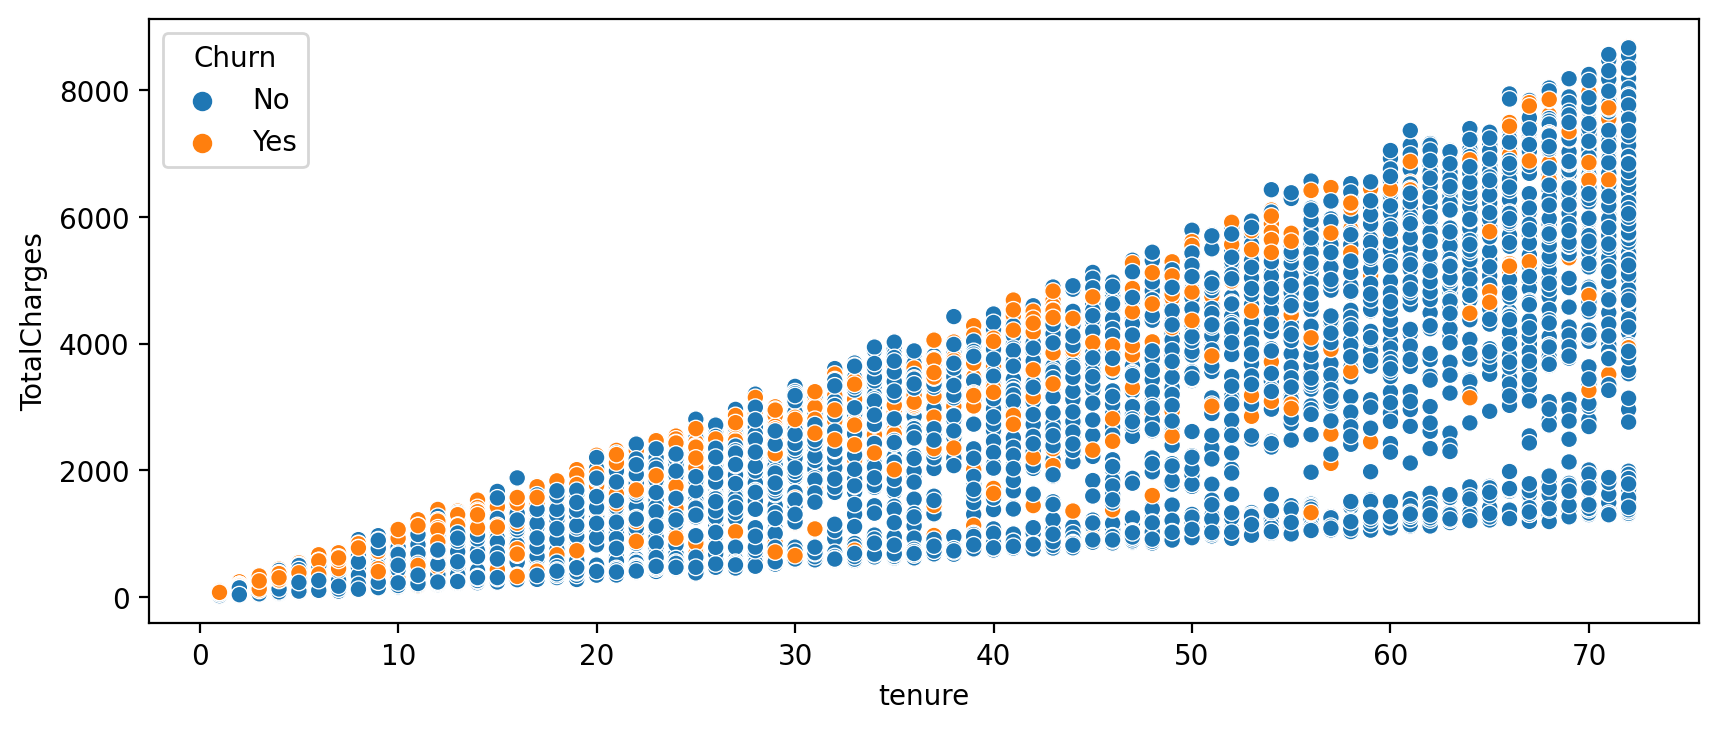

In [11]:
plt.figure(figsize=(10,4), dpi=200)

sns.scatterplot(y='TotalCharges', x = 'tenure', data=df, hue='Churn')

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

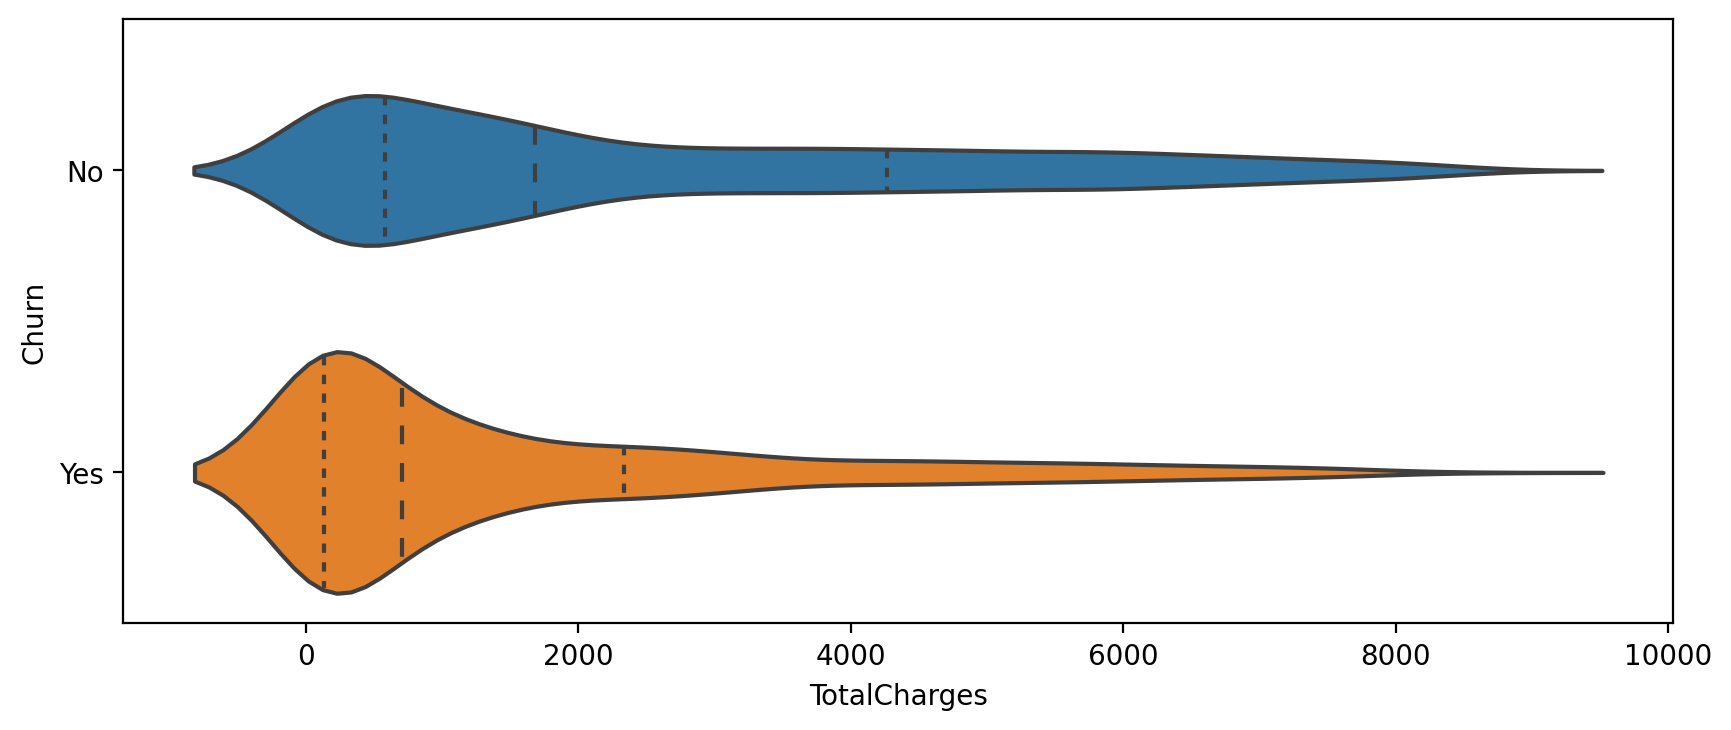

In [12]:
plt.figure(figsize=(10,4), dpi=200)

sns.violinplot(x='TotalCharges', y = 'Churn', data=df, kind='violin', inner='quartile')

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

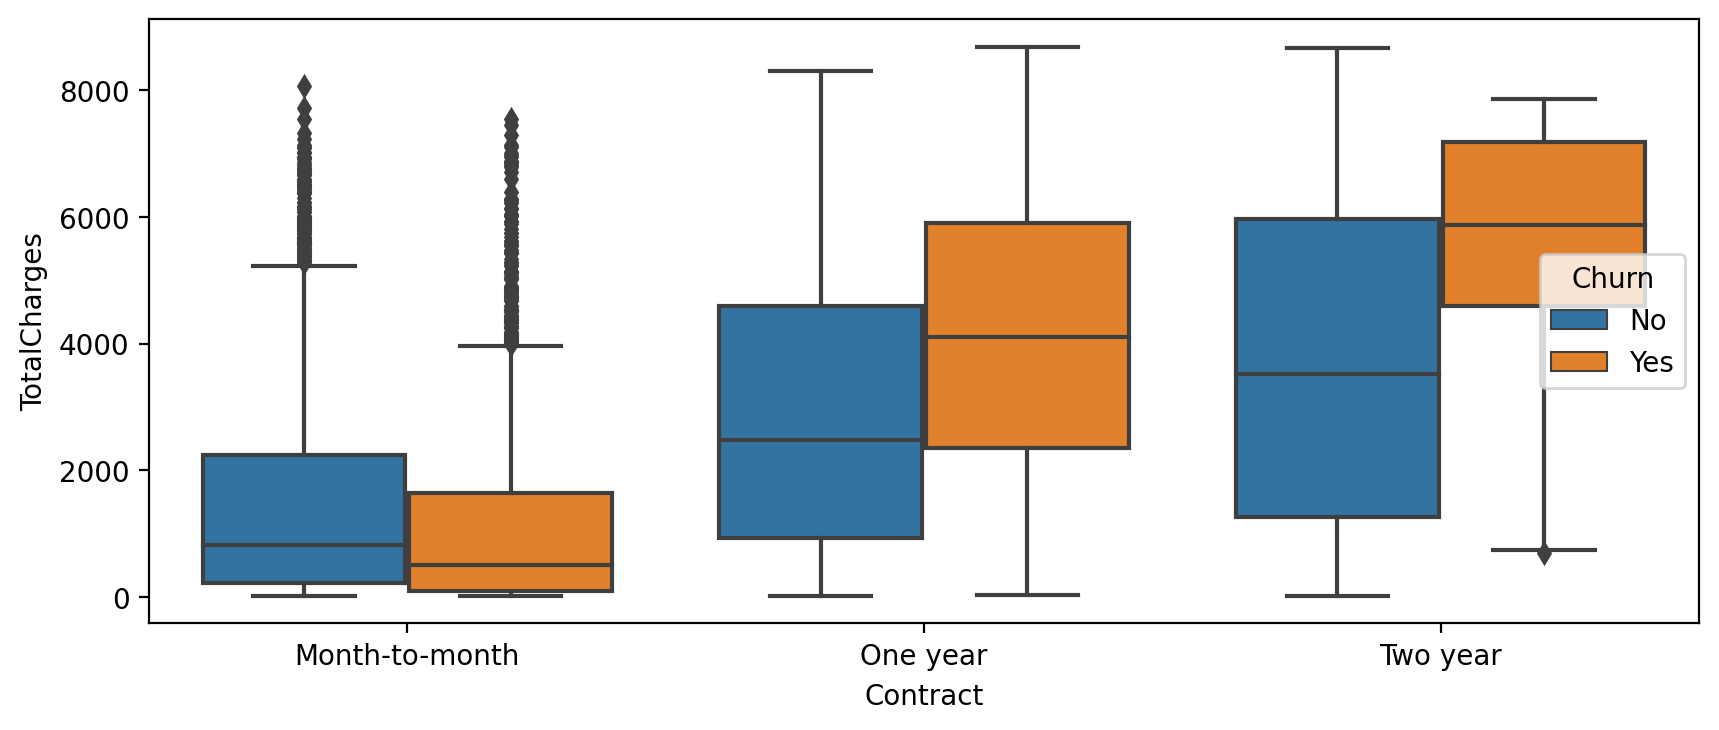

In [13]:
plt.figure(figsize=(10,4),dpi=200)

sns.boxplot(x='Contract', y='TotalCharges', data=df, hue='Churn')

## Find Correlation of Features to Yes Churn
- Which features are strongly correlated with discontinued service? 

In [14]:
df.columns[0:-1]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [15]:
## Converting the categorical columns into dummies except for customer ID
corr_df = pd.get_dummies(df, prefix=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'], columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'])

In [16]:
pd.DataFrame(corr_df.corr()['Churn_Yes'])

,Churn_Yes
SeniorCitizen,0.150541
tenure,-0.354049
MonthlyCharges,0.192858
TotalCharges,-0.199484
gender_Female,0.008545
gender_Male,-0.008545
Partner_No,0.149982
Partner_Yes,-0.149982
Dependents_No,0.163128
Dependents_Yes,-0.163128


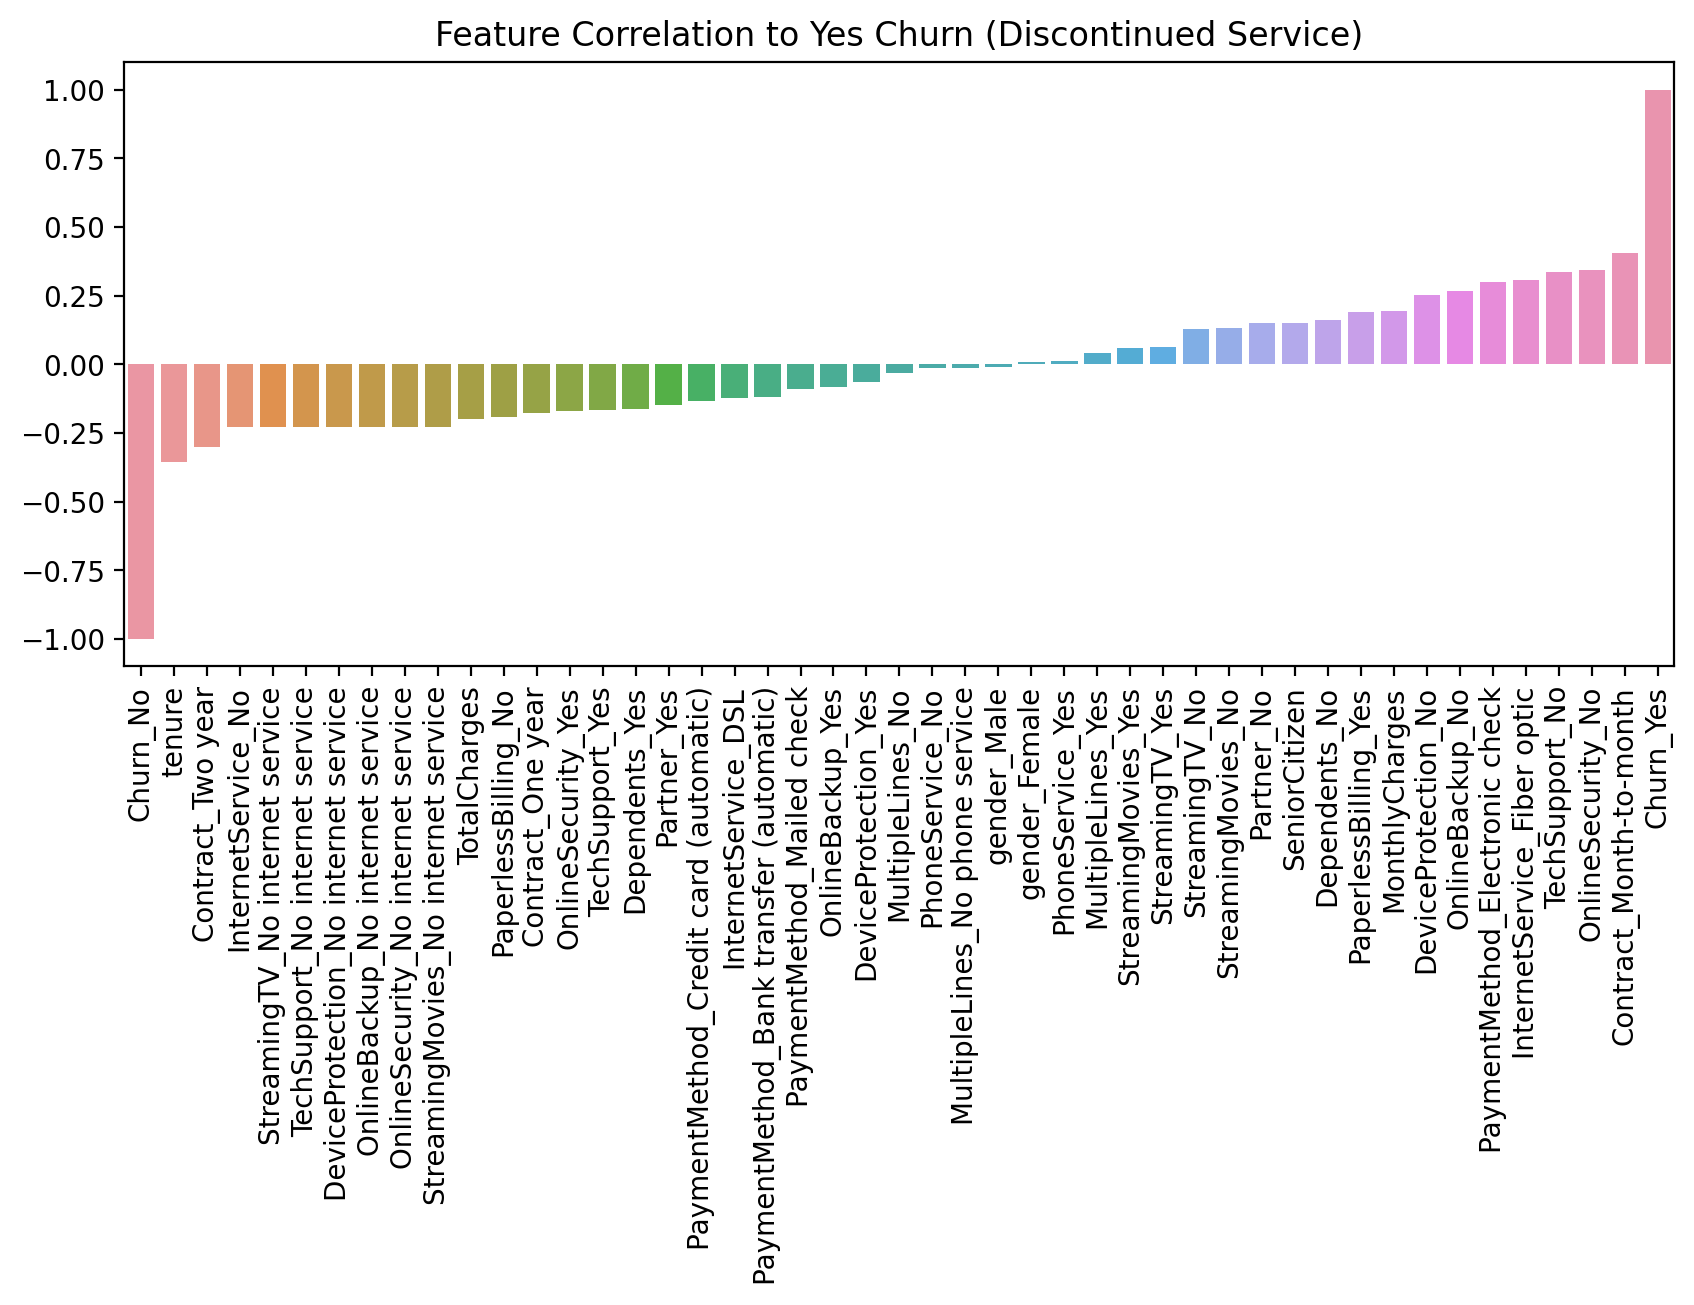

In [17]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=pd.DataFrame(corr_df.corr()['Churn_Yes'].sort_values()).index,y=pd.DataFrame(corr_df.corr()['Churn_Yes'].sort_values())['Churn_Yes'],data=pd.DataFrame(corr_df.corr()['Churn_Yes'].sort_values()))
plt.ylabel('')
plt.title('Feature Correlation to Yes Churn (Discontinued Service)')
plt.xticks(rotation=90);

## Predictive Modeling (Tree - Based Methods)
- no need to scale in decision based methods since at one feature is being used at each 

### Converting Categorical Columns to Dummies

In [18]:
df = pd.get_dummies(df, prefix=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'])

### Separate into Label & Features

In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### Train | Test | Split
- keeping exact same as Part A to compare

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
random_forest = RandomForestClassifier()
param_grid ={'n_estimators':[25, 50, 100, 150, 200],'criterion':['gini','entropy'], 'max_features':[2,4,6,8], 'bootstrap':[True, False], 'oob_score':[True, False]}

In [25]:
## Doing f1_weighted bc I know data is already imbalanced so accuracy might lead to accuracy paradox
random_forest_cv = GridSearchCV(random_forest,param_grid,cv=5, scoring = 'f1_weighted')

In [26]:
random_forest_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [2, 4, 6, 8],
                         'n_estimators': [25, 50, 100, 150, 200],
                         'oob_score': [True, False]},
             scoring='f1_weighted')

### Helper Function

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve

In [28]:
def run_model(model, X_train, y_train, X_test, y_test):
    print('Returning Best Params...')
    print(model.best_params_)
    print('Top 4 Feature Importances')
    indices = np.argsort(model.best_estimator_.feature_importances_)[-5:]
    print(X.columns[indices])
    print('\n\n Performance Metrics')
    pred = model.predict(X_test)
    print('\nConfusion Matrix')
    print(confusion_matrix(y_test,pred))
    print('\nAccuracy Score')
    print(accuracy_score(y_test,pred))
    print('\nClassification Report Matrix')
    print(classification_report(y_test,pred))
    print('\nROC Curve')
    fig,ax = plt.subplots(figsize=(12,8), dpi=200)
    plot_roc_curve(model,X_test,y_test, ax=ax)

Returning Best Params...
{'bootstrap': True, 'criterion': 'gini', 'max_features': 8, 'n_estimators': 50, 'oob_score': True}
Top 4 Feature Importances
Index(['OnlineSecurity_No', 'Contract_Month-to-month', 'MonthlyCharges',
       'tenure', 'TotalCharges'],
      dtype='object')


 Performance Metrics

Confusion Matrix
[[1381  168]
 [ 293  268]]

Accuracy Score
0.7815165876777251

Classification Report Matrix
              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1549
         Yes       0.61      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110


ROC Curve


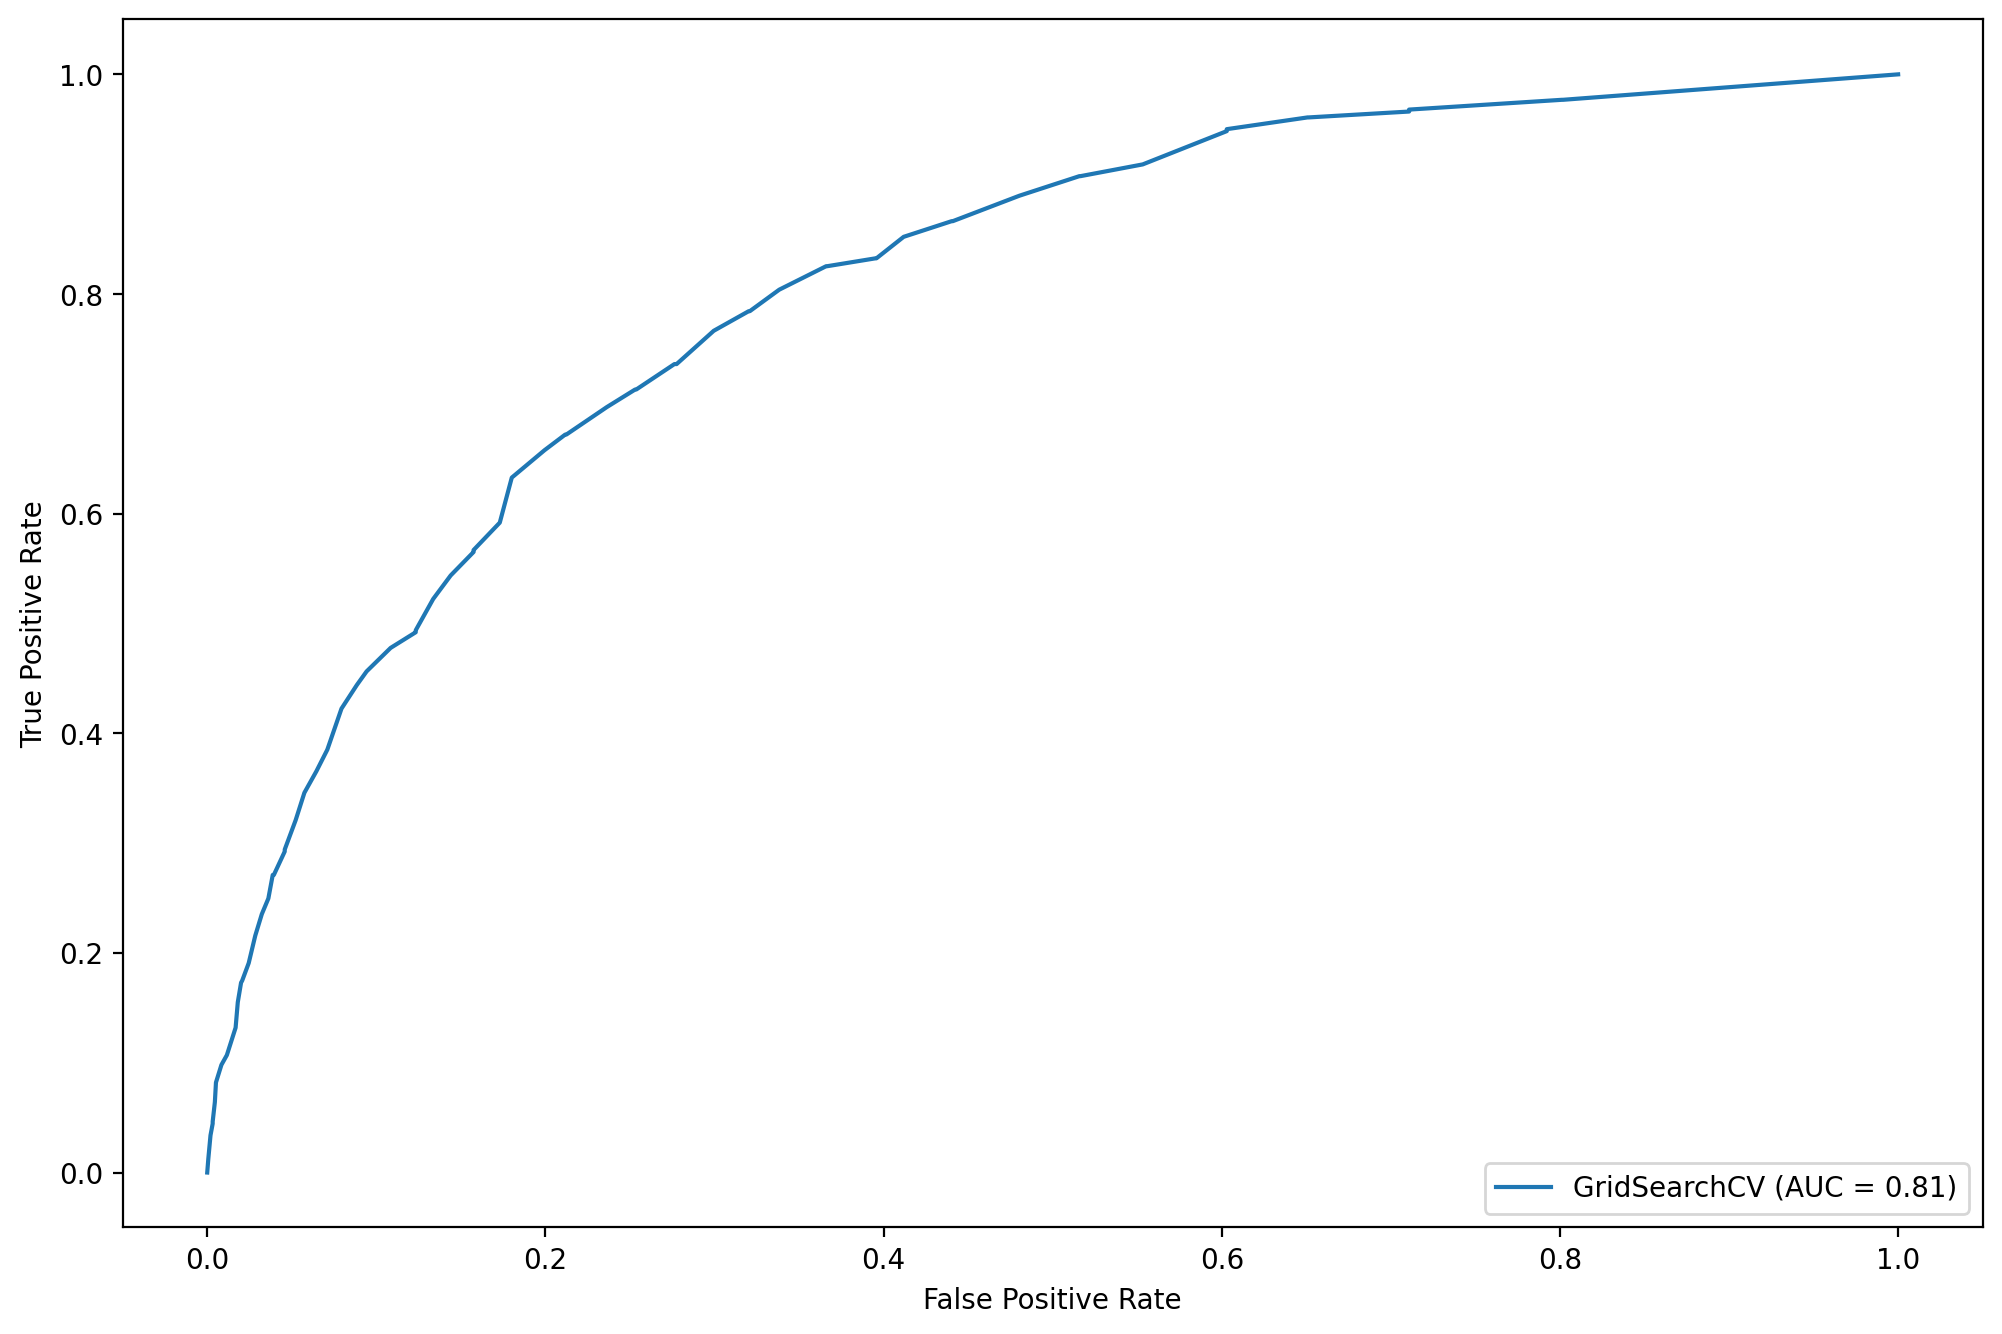

In [29]:
run_model(random_forest_cv, X_train, y_train, X_test, y_test)

## Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [31]:
gradient_boosting = GradientBoostingClassifier()
param_grid = {'n_estimators':[25, 50, 100, 150, 200],
    'learning_rate':[0.1,0.05,0.2],
    'max_depth':[3,4,5, 8]}

In [32]:
gradient_boosting_cv = GridSearchCV(gradient_boosting,param_grid,cv=5, scoring = 'f1_weighted')

In [33]:
gradient_boosting_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 8],
                         'n_estimators': [25, 50, 100, 150, 200]},
             scoring='f1_weighted')

Returning Best Params...
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Top 4 Feature Importances
Index(['TotalCharges', 'InternetService_Fiber optic', 'MonthlyCharges',
       'tenure', 'Contract_Month-to-month'],
      dtype='object')


 Performance Metrics

Confusion Matrix
[[1387  162]
 [ 277  284]]

Accuracy Score
0.7919431279620853

Classification Report Matrix
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1549
         Yes       0.64      0.51      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110


ROC Curve


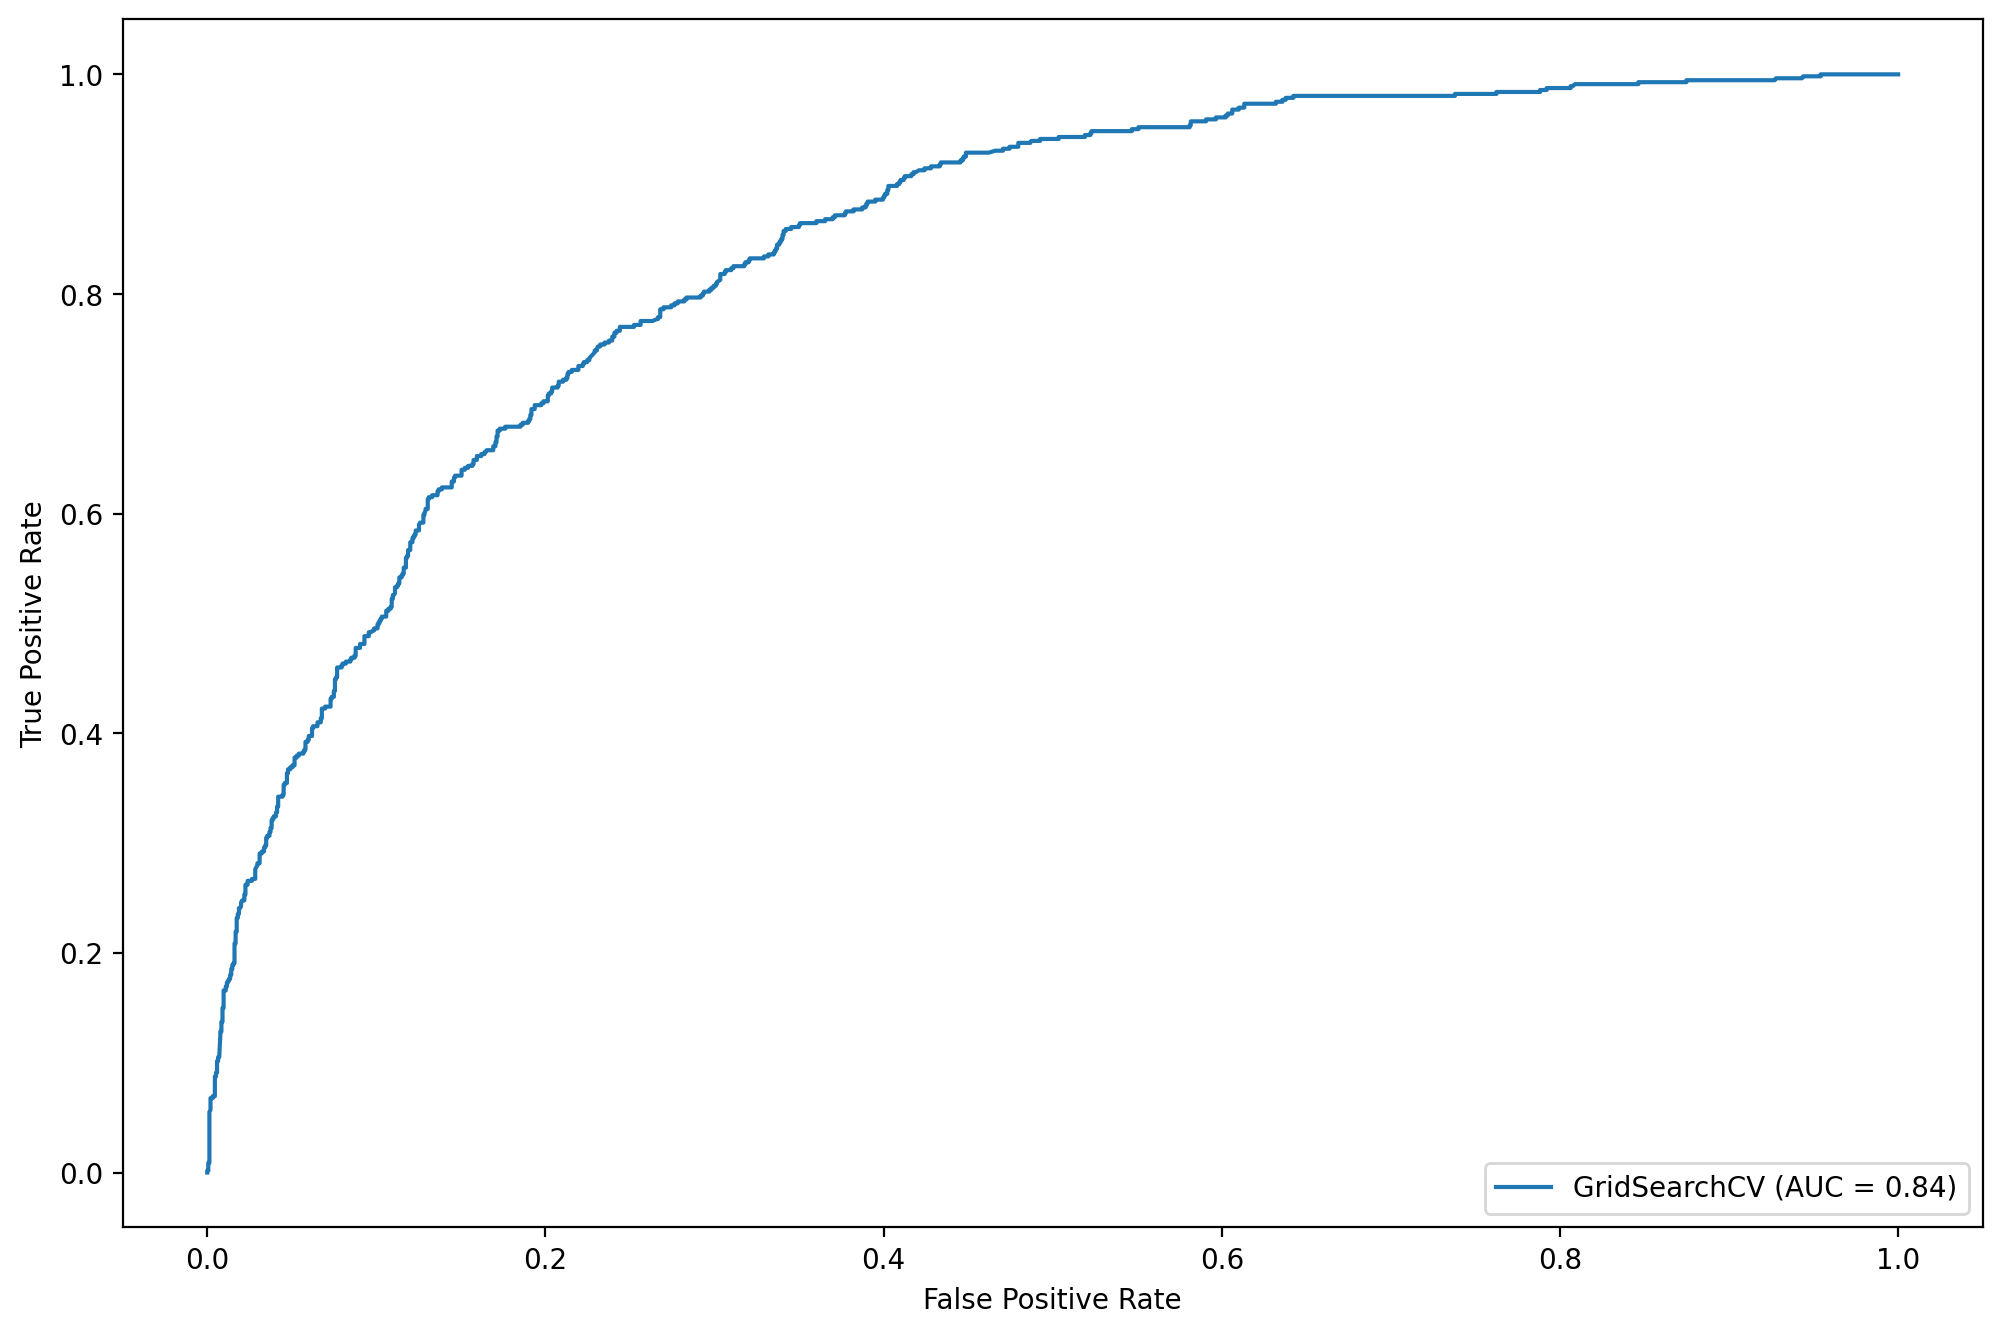

In [34]:
run_model(gradient_boosting_cv, X_train, y_train, X_test, y_test)

## Ada Boosting

In [35]:
ada_boosting = AdaBoostClassifier()
param_grid = {'n_estimators':[25, 50, 100, 150, 200], 'learning_rate':[0.1,0.05,0.2]}

In [36]:
ada_boosting_cv = GridSearchCV(ada_boosting, param_grid, cv=5, scoring = 'f1_weighted')

In [37]:
ada_boosting_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'n_estimators': [25, 50, 100, 150, 200]},
             scoring='f1_weighted')

Returning Best Params...
{'learning_rate': 0.2, 'n_estimators': 150}
Top 4 Feature Importances
Index(['InternetService_Fiber optic', 'MultipleLines_No', 'MonthlyCharges',
       'tenure', 'TotalCharges'],
      dtype='object')


 Performance Metrics

Confusion Matrix
[[1385  164]
 [ 260  301]]

Accuracy Score
0.7990521327014218

Classification Report Matrix
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1549
         Yes       0.65      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110


ROC Curve


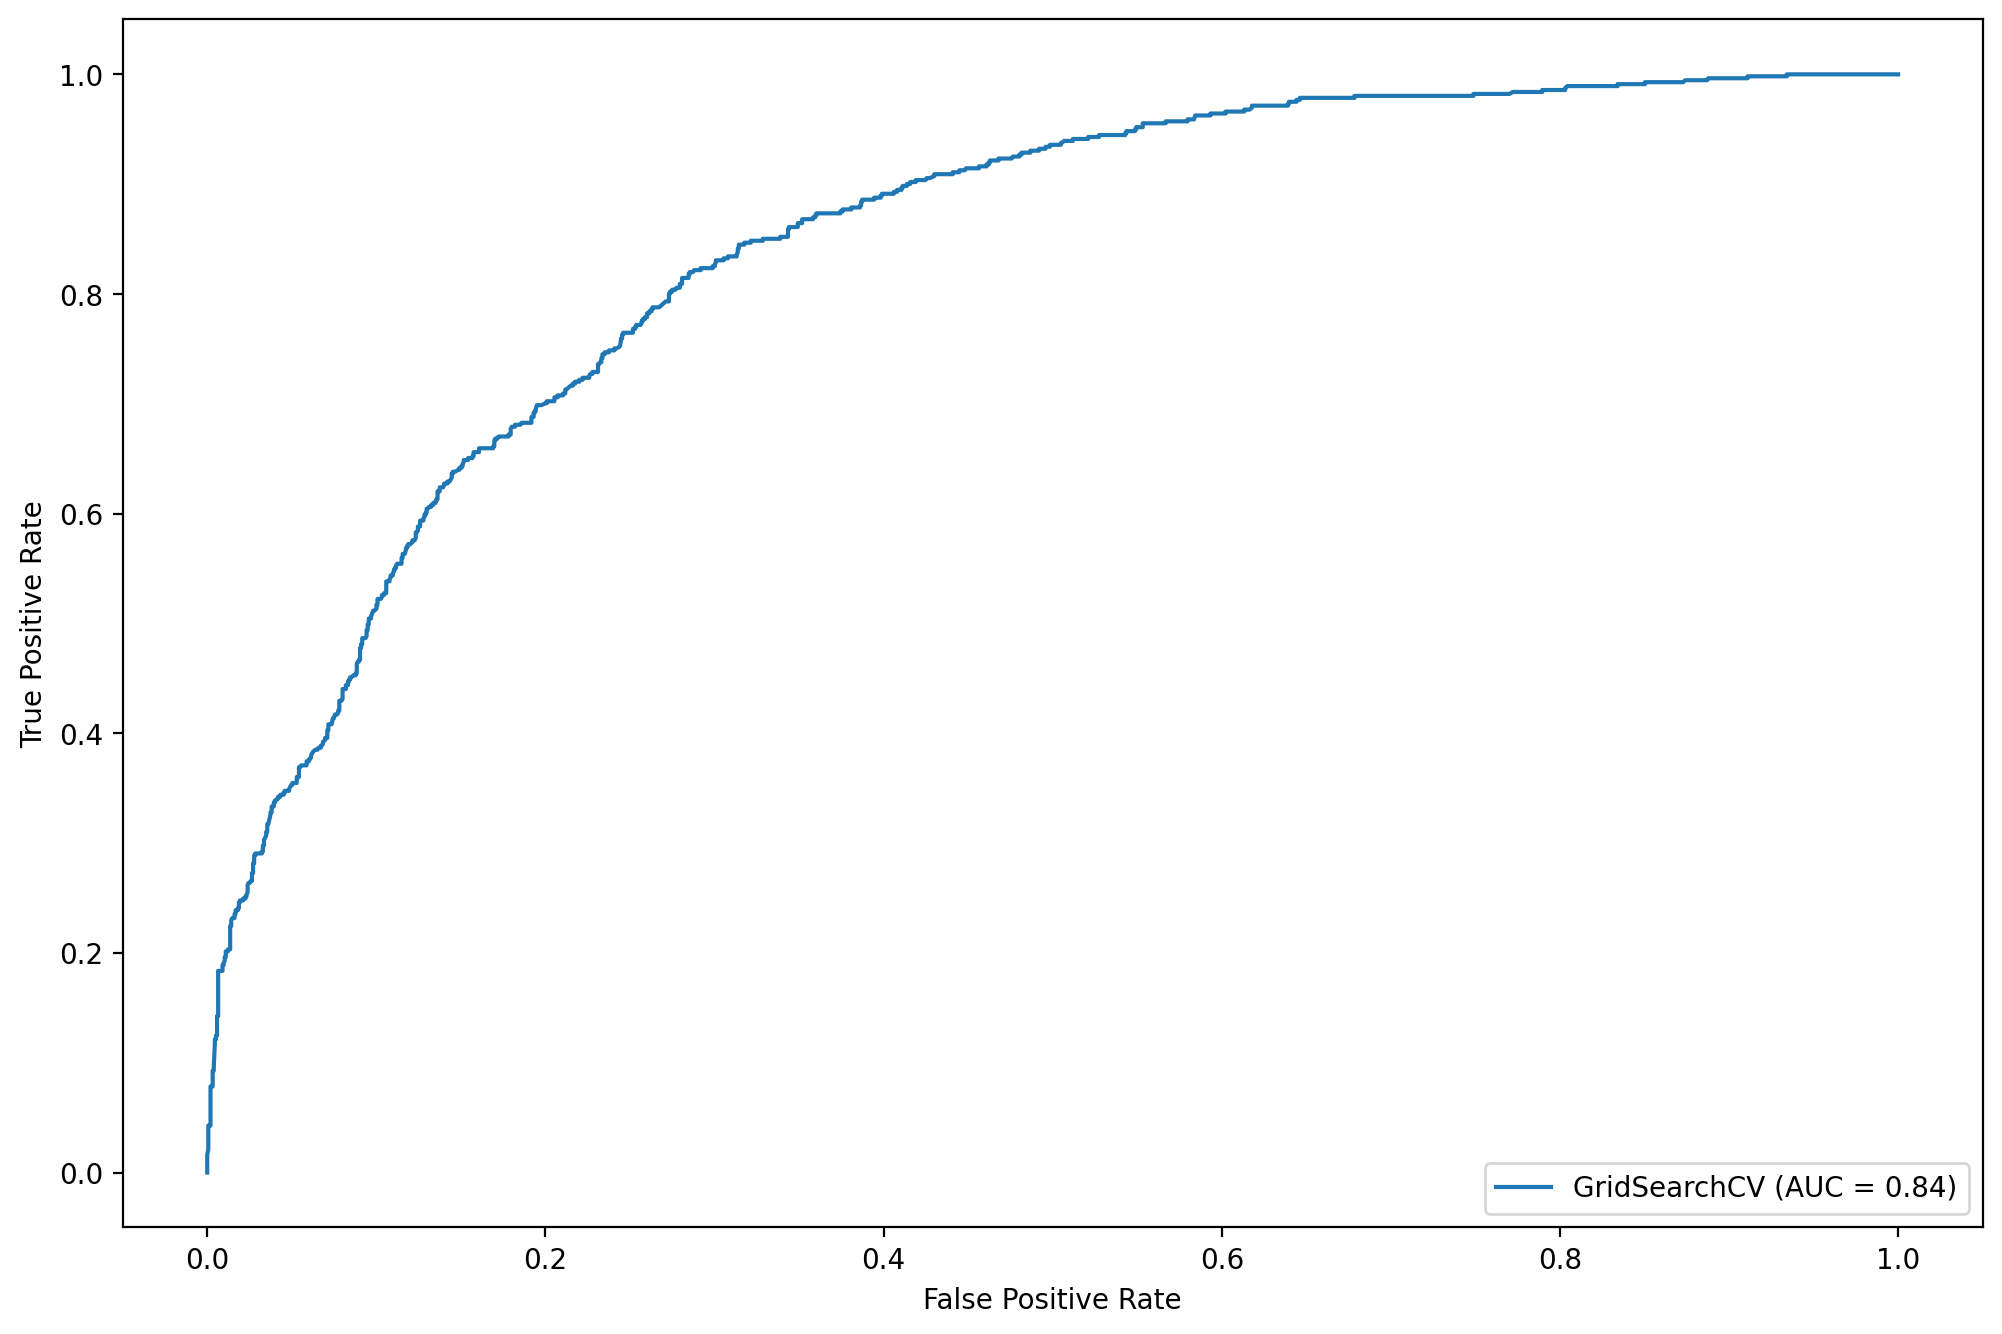

In [38]:
run_model(ada_boosting_cv, X_train, y_train, X_test, y_test)

In [39]:
## Based on the ROC Curves and Classification Report, AdaBoost seems to be the best model to predict whether or not Churn is yes or not